### `ENVIRONMENT SETUP`

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### `CHANGING WORKING DIR`

In [2]:
path = 'G:\\ML - Datahack\\WNS\\Supplied'

os.chdir(path)

%pwd

'G:\\ML - Datahack\\WNS\\Supplied'

### `READING FILES`

In [3]:
df_train = pd.read_csv('train.csv', parse_dates = ['impression_time']) 
df_train.drop_duplicates(inplace=True)

df_log = pd.read_csv('view_log.csv', parse_dates = ['server_time']) 
df_log.drop_duplicates(inplace=True)

df_item = pd.read_csv('item_data.csv') 
df_item.drop_duplicates(inplace=True)

df_test = pd.read_csv('test.csv', parse_dates = ['impression_time'])

In [4]:
df_train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [5]:
df_log.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [6]:
df_item.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [7]:
df_test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [8]:
df_train.shape

(237609, 7)

In [9]:
df_test.shape

(90675, 6)

In [10]:
test_id = df_test.impression_id

### `CLICK THROUGH RATE - TRAIN DATA`

In [11]:
# Click % in train data
np.round(df_train['is_click'].value_counts()/len(df_train),3)

0    0.954
1    0.046
Name: is_click, dtype: float64

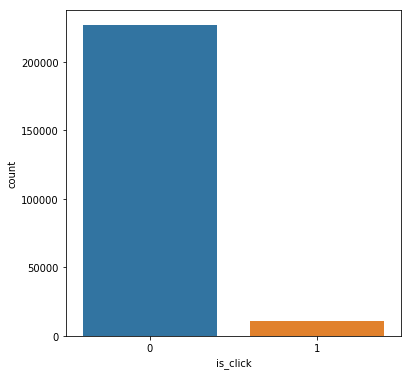

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='is_click',data=df_train);

### `NEW FEATURES`

In [13]:
df_train['day'] = df_train.impression_time.dt.weekday
df_train['hour'] = df_train.impression_time.dt.hour
# df_train['minute'] = df_train.impression_time.dt.minute

df_test['day'] = df_test.impression_time.dt.weekday
df_test['hour'] = df_test.impression_time.dt.hour
# df_test['minute'] = df_test.impression_time.dt.minute

df_log['day'] = df_log.server_time.dt.weekday
df_log['hour'] = df_log.server_time.dt.hour
# df_log['minute'] = df_log.server_time.dt.minute

In [14]:
x = df_log.groupby('user_id').device_type.unique()

user_device = pd.DataFrame()
user_device['user_id'] = x.index.values
user_device['device_type'] = x.values

In [15]:
user_device['android'] = user_device.device_type.apply(lambda x: 1 if 'android' in x else 0)
user_device['iphone'] = user_device.device_type.apply(lambda x: 1 if 'iphone' in x else 0)
user_device['web'] = user_device.device_type.apply(lambda x: 1 if 'web' in x else 0)

user_device.drop('device_type', axis=1, inplace=True)

In [16]:
train = pd.merge(df_train, user_device, on='user_id', how='left')
test = pd.merge(df_test, user_device, on='user_id', how='left')

In [17]:
train.shape

(237609, 12)

In [18]:
test.shape

(90675, 11)

### `CHECKING FOR MISSING VALUES`

In [19]:
train.isnull().sum()

impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
is_click           0
day                0
hour               0
android            0
iphone             0
web                0
dtype: int64

In [20]:
test.isnull().sum()

impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
day                0
hour               0
android            0
iphone             0
web                0
dtype: int64

In [21]:
df_log.isnull().sum()

server_time    0
device_type    0
session_id     0
user_id        0
item_id        0
day            0
hour           0
dtype: int64

In [22]:
df_item.isnull().sum()

item_id         0
item_price      0
category_1      0
category_2      0
category_3      0
product_type    0
dtype: int64

### `EDA`

In [23]:
train.groupby('hour').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks during thr day');

In [24]:
train.groupby(['hour', 'is_click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

In [25]:
df_click = train[train['is_click'] == 1]
df_hour = train[['hour','is_click']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'is_click': 'impressions'})
df_hour['clicks'] = df_click[['hour','is_click']].groupby(['hour']).count().reset_index()['is_click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR');

In [26]:
train.groupby('day').agg({'is_click':'sum'}).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

In [27]:
train.groupby(['day','is_click']).size().unstack().plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

In [28]:
train.groupby(['app_code', 'is_click']).size().unstack().plot(kind='bar', 
                                                            figsize=(12,6), title='App Code histogram');

In [29]:
train.groupby(['os_version', 'is_click']).size().unstack().plot(kind='bar', 
                                                            figsize=(12,6), title='OS Version histogram');

In [30]:
train.groupby(['is_4G', 'is_click']).size().unstack().plot(kind='bar', 
                                                            figsize=(12,6), title='4G histogram');

### `CTR CALCULATION FOR VARIOUS FEATURES`

In [31]:
hour = train.groupby(['hour', 'is_click']).size()
hour_pcts = hour.groupby(level=0).apply(lambda x: np.round(100 * x / float(x.sum()),2))

hour_ctr = pd.DataFrame()
hour_ctr['hour'] = hour_pcts[:,1].index.values
hour_ctr['hr_ctr'] = hour_pcts[:,1].values

In [32]:
day = train.groupby(['day', 'is_click']).size()
day_pcts = day.groupby(level=0).apply(lambda x: np.round(100 * x / float(x.sum()),2))

day_ctr = pd.DataFrame()
day_ctr['day'] = day_pcts[:,1].index.values
day_ctr['day_ctr'] = day_pcts[:,1].values

In [33]:
app= train.groupby(['app_code', 'is_click']).size()
app_pcts = app.groupby(level=0).apply(lambda x: np.round(100 * x / float(x.sum()),2))

app_ctr = pd.DataFrame()
app_ctr['app_code'] = app_pcts[:,1].index.values
app_ctr['app_ctr'] = app_pcts[:,1].values

In [34]:
os= train.groupby(['os_version', 'is_click']).size()
os_pcts = os.groupby(level=0).apply(lambda x: np.round(100 * x / float(x.sum()),2))

os_ctr = pd.DataFrame()
os_ctr['os_version'] = os_pcts[:,1].index.values
os_ctr['os_ctr'] = os_pcts[:,1].values

In [35]:
smart= train.groupby(['is_4G', 'is_click']).size()
smart_pcts = smart.groupby(level=0).apply(lambda x: np.round(100 * x / float(x.sum()),2))

smart_ctr = pd.DataFrame()
smart_ctr['is_4G'] = smart_pcts[:,1].index.values
smart_ctr['4g_ctr'] = smart_pcts[:,1].values

In [36]:
train = pd.merge(train, hour_ctr, on='hour', how='left')
train = pd.merge(train, day_ctr, on='day', how='left')
train = pd.merge(train, app_ctr, on='app_code', how='left')
train = pd.merge(train, os_ctr, on='os_version', how='left')
train = pd.merge(train, smart_ctr, on='is_4G', how='left')

In [37]:
test = pd.merge(test, hour_ctr, on='hour', how='left')
test = pd.merge(test, day_ctr, on='day', how='left')
test = pd.merge(test, app_ctr, on='app_code', how='left')
test = pd.merge(test, os_ctr, on='os_version', how='left')
test = pd.merge(test, smart_ctr, on='is_4G', how='left')

In [38]:
### Total items for users 
log_event = pd.merge(df_log, df_item, on='item_id', how='left')

misc = log_event.groupby('user_id').item_price.mean()

cost = pd.DataFrame()
cost['user_id'] = misc.index.values
cost['avg_itemprice'] = np.round(misc.values,2)

train = pd.merge(train, cost, on='user_id', how='left')
test = pd.merge(test, cost, on='user_id', how='left')

misc = log_event.groupby('user_id').product_type.count()

icount = pd.DataFrame()
icount['user_id'] = misc.index.values
icount['count'] = np.round(misc.values,2)

train = pd.merge(train, icount, on='user_id', how='left')
test = pd.merge(test, icount, on='user_id', how='left')

In [39]:
train['count'] = train['count'].astype('float')
test['count'] = test['count'].astype('float')

In [40]:
train.isnull().sum()

impression_id         0
impression_time       0
user_id               0
app_code              0
os_version            0
is_4G                 0
is_click              0
day                   0
hour                  0
android               0
iphone                0
web                   0
hr_ctr                0
day_ctr               0
app_ctr            1448
os_ctr                0
4g_ctr                0
avg_itemprice         3
count                 0
dtype: int64

In [41]:
test.isnull().sum()

impression_id        0
impression_time      0
user_id              0
app_code             0
os_version           0
is_4G                0
day                  0
hour                 0
android              0
iphone               0
web                  0
hr_ctr               0
day_ctr              0
app_ctr            606
os_ctr               0
4g_ctr               0
avg_itemprice        3
count                0
dtype: int64

In [42]:
train = train.fillna(0)
test = test.fillna(0)

In [43]:
train['click'] = train.is_click

# train.drop(['impression_id', 'impression_time','user_id', 'app_code','is_click'], axis=1, inplace=True)
train.drop(['impression_id', 'impression_time','user_id', 'app_code','is_click', 'os_version', 'day', 'hour'], 
           axis=1, inplace=True)

In [44]:
test.drop(['impression_id', 'impression_time', 'app_code','user_id', 'os_version', 'day', 'hour'], axis=1, 
          inplace=True)

### `BOOLEAN VARIABLES`

In [45]:
bool_mask = ['is_4G', 'android', 'iphone', 'web']

train[bool_mask] = train[bool_mask].astype('bool')
test[bool_mask] = test[bool_mask].astype('bool')

### `FEATURE SCALING`

In [46]:
from sklearn.preprocessing import MinMaxScaler

scale_df = train.drop('click', axis=1)

nmask = scale_df.select_dtypes(['float64', 'int64']).columns.values 

nmask

array(['hr_ctr', 'day_ctr', 'app_ctr', 'os_ctr', '4g_ctr',
       'avg_itemprice', 'count'], dtype=object)

In [47]:
if len(nmask) > 0:
    sc_train = MinMaxScaler()

    # Scaling numeric features
    train_norm = sc_train.fit_transform(train[nmask])
    train[nmask] = train_norm   

In [48]:
if len(nmask) > 0:
    sc_test = MinMaxScaler()

    # Scaling numeric features
    test_norm = sc_test.fit_transform(test[nmask])
    test[nmask] = test_norm    

In [49]:
train.head()

,is_4G,android,iphone,web,hr_ctr,day_ctr,app_ctr,os_ctr,4g_ctr,avg_itemprice,count,click
0,False,True,False,False,0.375,0.568627,0.1468,0.752475,1.0,0.005246,0.000356,0
1,True,True,False,False,0.375,0.568627,0.0616,0.000000,0.0,0.009939,0.004277,1
2,True,True,False,False,0.375,0.568627,0.0498,1.000000,0.0,0.003568,0.000713,0
3,True,True,False,False,0.375,0.568627,0.1234,0.000000,0.0,0.022240,0.006415,0
4,False,True,False,False,0.375,0.568627,0.0502,0.000000,1.0,0.019635,0.016037,0


In [50]:
test.head()

,is_4G,android,iphone,web,hr_ctr,day_ctr,app_ctr,os_ctr,4g_ctr,avg_itemprice,count
0,True,True,False,False,0.072115,0.568627,0.0532,0.0,0.0,0.077588,0.000897
1,False,True,False,False,0.072115,0.568627,0.0062,0.0,1.0,0.036470,0.062780
2,True,True,False,False,0.072115,0.568627,0.0770,0.0,0.0,0.017661,0.007175
3,True,True,False,False,0.072115,0.568627,0.0143,0.0,0.0,0.049025,0.031390
4,True,True,False,False,0.072115,0.568627,0.0986,0.0,0.0,0.029077,0.025112


### `FEATURE SELECTION`

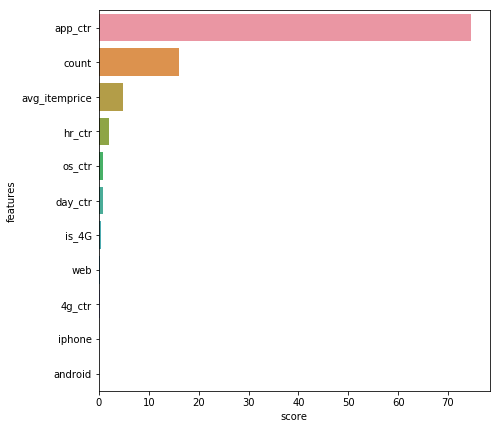

In [51]:
from catboost import CatBoostClassifier

X = train.drop('click', axis=1)
Y = train.click

cat = CatBoostClassifier(random_state=0, loss_function = 'Logloss', eval_metric='AUC', depth=3, logging_level='Silent')

cat.fit(X, Y)

cat_imp = pd.DataFrame()
cat_imp['features'] = cat.feature_names_ 
cat_imp['score'] = cat.feature_importances_

cat_imp = cat_imp.sort_values(by = 'score', ascending = False)

plt.rcParams['figure.figsize'] = (7, 7)
sns.barplot(y = 'features', x = 'score', data=cat_imp);

In [52]:
mask = cat_imp[cat_imp.score > 0].features.values
# mask = importance_df[importance_df.importance_mean > 0].feature.values
mask

array(['app_ctr', 'count', 'avg_itemprice', 'hr_ctr', 'os_ctr', 'day_ctr',
       'is_4G', 'web', '4g_ctr', 'iphone', 'android'], dtype=object)

In [53]:
train_new = train.loc[:, mask]
train_new['click'] = train.loc[:, 'click']

test_new = test.loc[:, mask]

In [54]:
train_new.head()

,app_ctr,count,avg_itemprice,hr_ctr,os_ctr,day_ctr,is_4G,web,4g_ctr,iphone,android,click
0,0.1468,0.000356,0.005246,0.375,0.752475,0.568627,False,False,1.0,False,True,0
1,0.0616,0.004277,0.009939,0.375,0.000000,0.568627,True,False,0.0,False,True,1
2,0.0498,0.000713,0.003568,0.375,1.000000,0.568627,True,False,0.0,False,True,0
3,0.1234,0.006415,0.022240,0.375,0.000000,0.568627,True,False,0.0,False,True,0
4,0.0502,0.016037,0.019635,0.375,0.000000,0.568627,False,False,1.0,False,True,0


In [55]:
test_new.head()

,app_ctr,count,avg_itemprice,hr_ctr,os_ctr,day_ctr,is_4G,web,4g_ctr,iphone,android
0,0.0532,0.000897,0.077588,0.072115,0.0,0.568627,True,False,0.0,False,True
1,0.0062,0.062780,0.036470,0.072115,0.0,0.568627,False,False,1.0,False,True
2,0.0770,0.007175,0.017661,0.072115,0.0,0.568627,True,False,0.0,False,True
3,0.0143,0.031390,0.049025,0.072115,0.0,0.568627,True,False,0.0,False,True
4,0.0986,0.025112,0.029077,0.072115,0.0,0.568627,True,False,0.0,False,True


### `MODEL`

In [56]:
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# X = train_new.loc[:, train_new.columns != 'click']
# y = train_new.click

X = train_new.drop('click', axis=1)
y = train_new.click

# Create the train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0, shuffle=True)

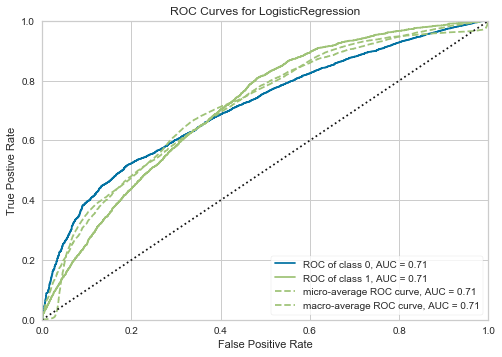

In [57]:
lreg = LogisticRegression(C = .1, class_weight ='balanced', penalty='l1')

visualizer = ROCAUC(lreg)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

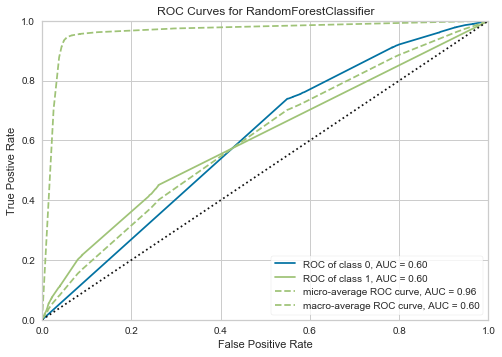

In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier

visualizer = ROCAUC(RandomForestClassifier(class_weight = 'balanced'))

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()       

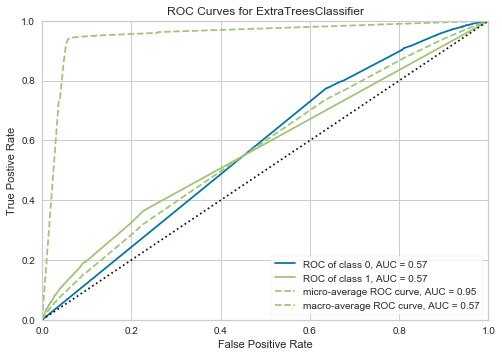

In [59]:
visualizer = ROCAUC(ExtraTreesClassifier(class_weight = 'balanced'))

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()       

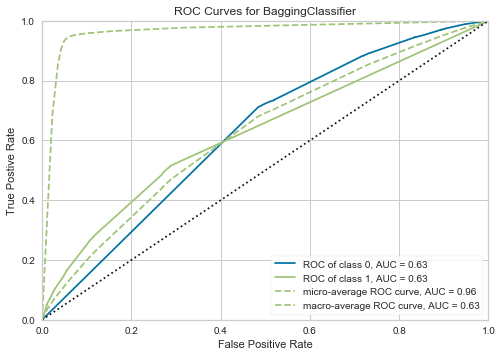

In [60]:
visualizer = ROCAUC(BaggingClassifier())

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()       

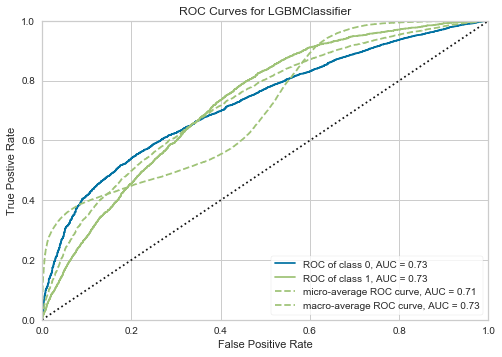

In [61]:
from lightgbm import LGBMClassifier 

lgb = LGBMClassifier(random_state=0, objective='binary', learning_rate=.1, max_depth = 5, n_estimators=100, 
                    class_weight = 'balanced')

visualizer = ROCAUC(lgb)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()       

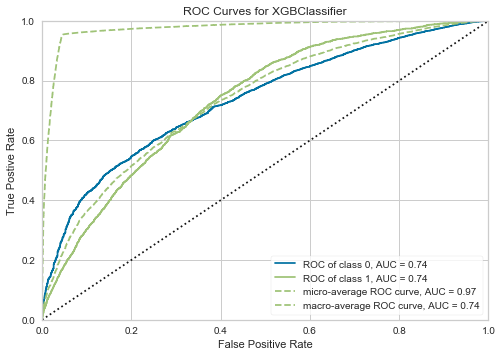

In [62]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0, max_depth = 15, learning_rate = .1, n_estimators=100, gamma=6)

visualizer = ROCAUC(xgb)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()       

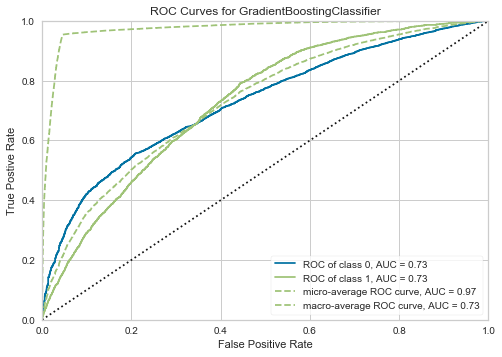

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=0, n_estimators=100, max_depth=5)

visualizer = ROCAUC(gbc)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### `STACKED MODEL`

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

combined_model = [('LGB', lgb), ('XGB', xgb), ('LR', lreg), ('GB', gbc)]

v =  VotingClassifier(estimators = combined_model, voting = 'soft')
v.fit(x_train, y_train)

sig_clf = CalibratedClassifierCV(v, method="sigmoid")

sig_clf.fit(x_train, y_train)

clf_probs = sig_clf.predict_proba(x_test)

from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,clf_probs[:, 1])
print(score)

0.7272226505531663


### `PREDICTIONS ON TEST DATA SET`

In [65]:
import os

path = 'G:\\ML - Datahack\\WNS'

os.chdir(path)

%pwd

'G:\\ML - Datahack\\WNS'

In [66]:
test_click = v.predict_proba(test_new)

clicks = test_click[:, 1]

In [67]:
sub = pd.DataFrame()
sub['impression_id'] = test_id
sub['is_click'] =  clicks

In [68]:
sub.to_csv('submission.csv', index=False)